<a href="https://colab.research.google.com/github/SwathiMenon/Machine_learning/blob/main/Credit_Card_Segmentation_using_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Aim : to find the relation between Cash in advance given by the user and How frequently Purchases are happening in one-go

DATASET: https://www.kaggle.com/code/alikken/credit-card-clustering


In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("/content/drive/MyDrive/datasets/CC GENERAL.xls")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


preprocessing

In [3]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df.drop(["CUST_ID"],inplace=True,axis=1)
df.drop(["MINIMUM_PAYMENTS"],inplace=True,axis=1)
df.dropna(inplace=True)

In [5]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

 **Exploratory Data Analysis**

In [6]:
#Calculating features having high correlation
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find features with high correlation
threshold = 0.9  # Adjust the threshold as needed
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# Print the highly correlated features
for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are highly correlated.")


PURCHASES and ONEOFF_PURCHASES are highly correlated.
ONEOFF_PURCHASES and PURCHASES are highly correlated.


In [7]:
#Calculating features having low correlation
#Calculate the correlation matrix
correlation_matrix = df.corr()

# Find features with low correlation
threshold = 0.03  # Adjust the threshold as needed
low_correlated_features = np.where(np.abs(correlation_matrix) < threshold)

# Print the low correlated features
for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are low correlated.")

PRC_FULL_PAYMENT and TENURE are low correlated.
TENURE and PRC_FULL_PAYMENT are low correlated.


<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='count'>

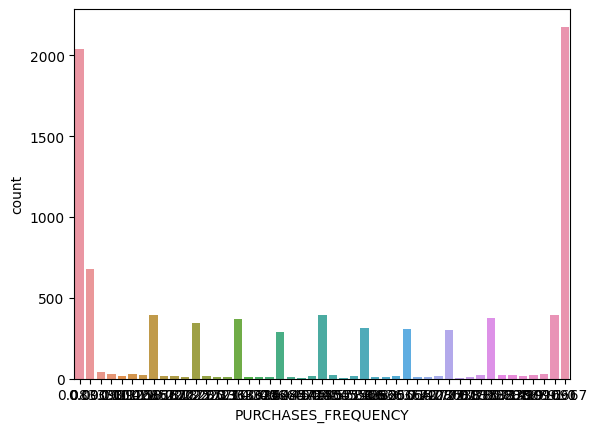

In [8]:
sns.countplot(x='PURCHASES_FREQUENCY',data=df)

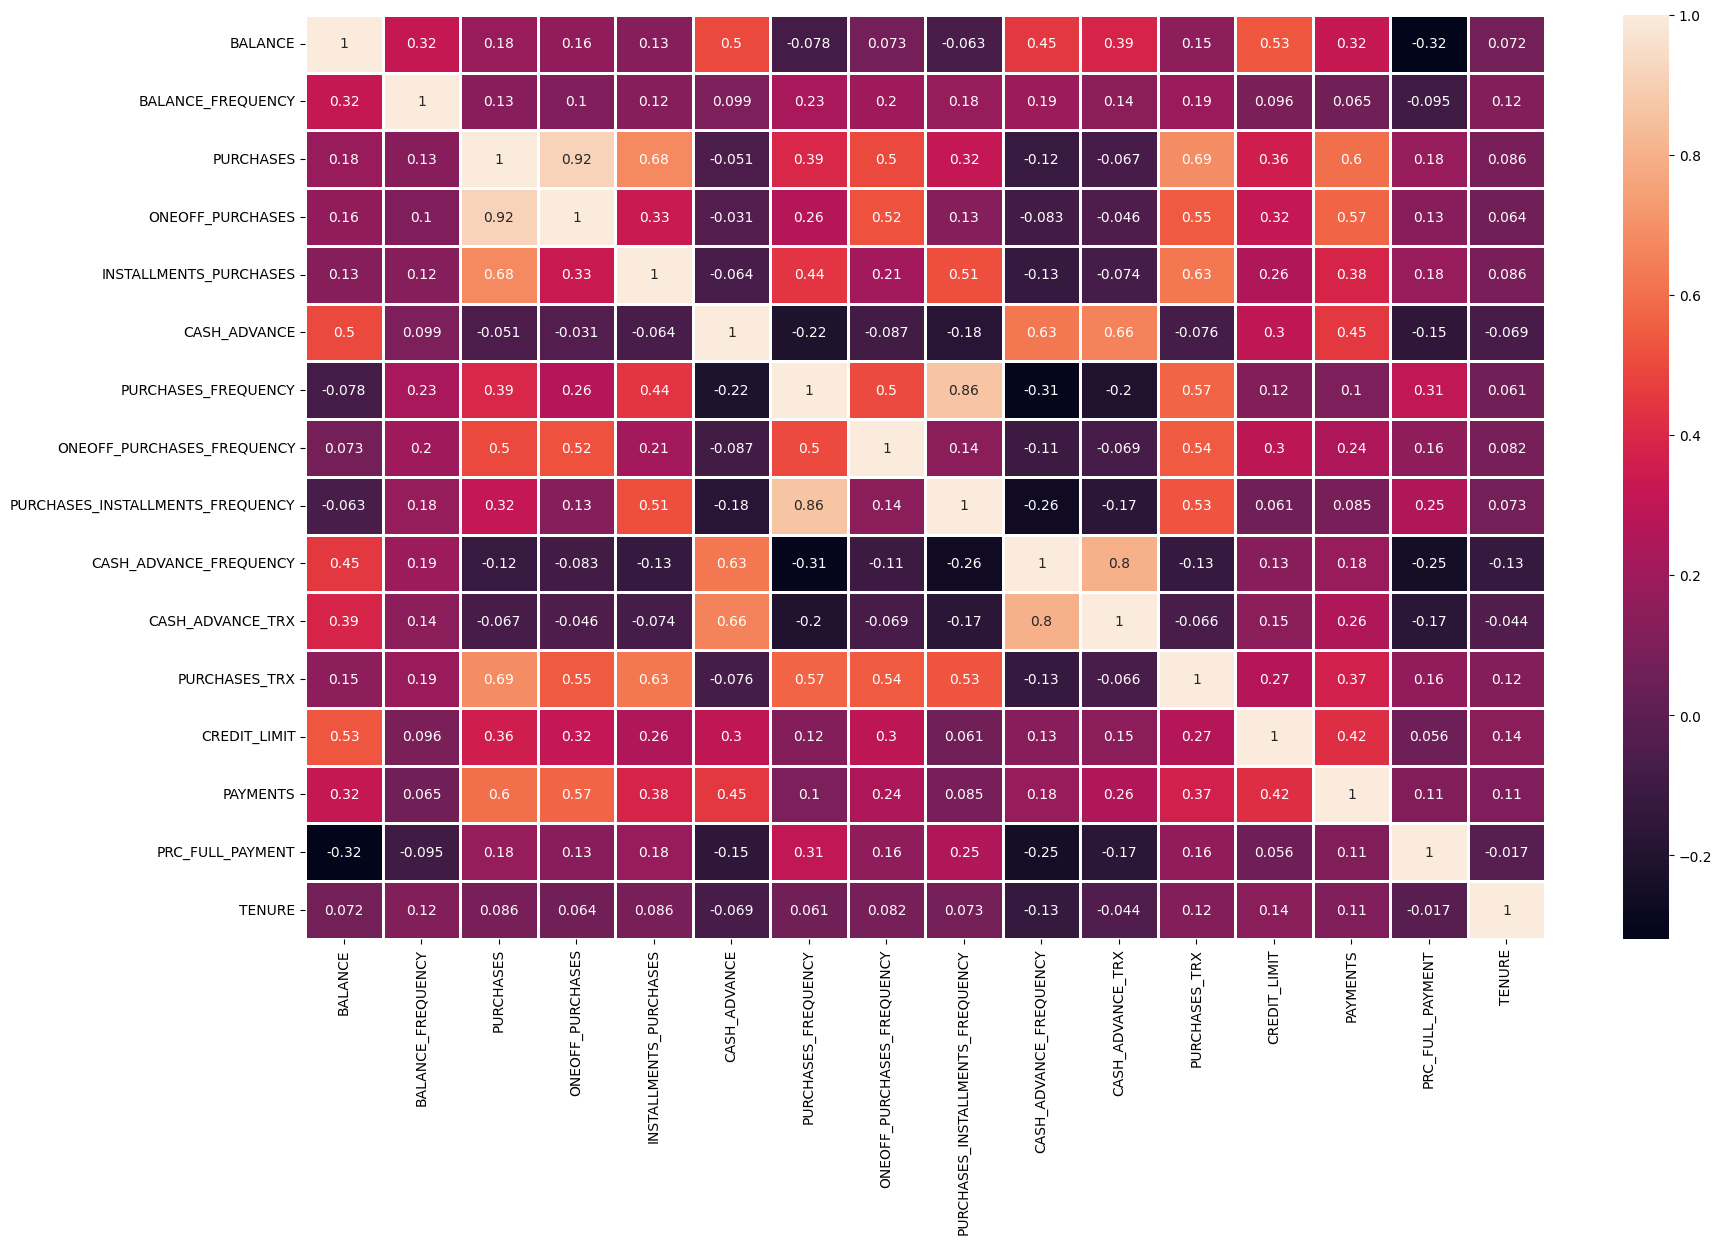

In [9]:
#correlation between variables
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

<Axes: xlabel='BALANCE_FREQUENCY', ylabel='count'>

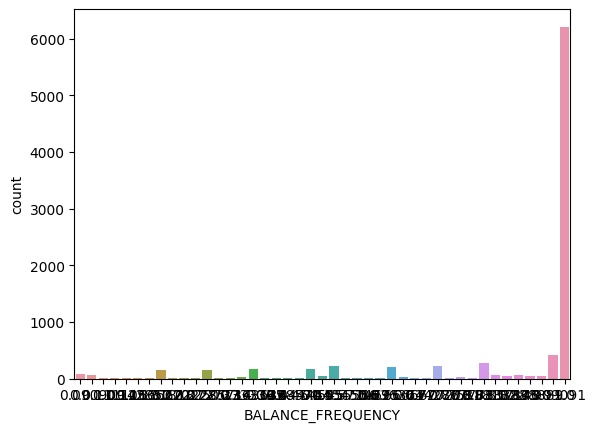

In [10]:
sns.countplot(x='BALANCE_FREQUENCY',data=df)

# K Means Clustering

In [11]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,0.250000,6


In [12]:
X=df.iloc[:,10:12:]
X

,CASH_ADVANCE_TRX,PURCHASES_TRX
0,0,2
1,4,0
2,0,12
3,1,1
4,0,1
...,...,...
8945,0,6
8946,0,6
8947,0,5
8948,2,0


In [13]:
#elbow
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss=[]
for i in range(1,7):
  km=KMeans(n_clusters=i,init='k-means++',random_state=4)
  km.fit(X)
  wcss.append(km.inertia_)

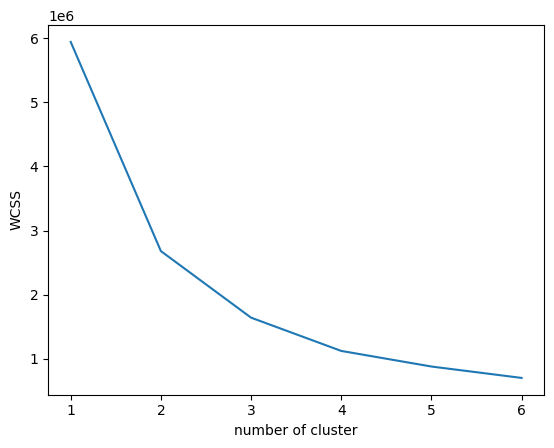

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,7),wcss)
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [15]:
km1=KMeans(n_clusters=2,init='k-means++',random_state=5)
y_kmeans=km1.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

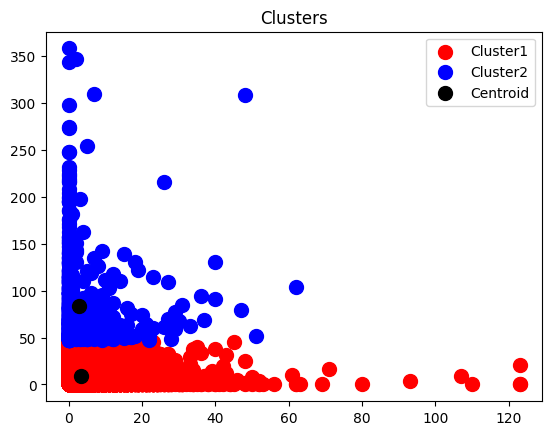

In [16]:
X=np.array(X)
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1],s = 100,c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1],s = 100,c = 'blue', label = 'Cluster2')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroid')
plt.title("Clusters")
plt.legend()
plt.show()